# Skillbox — Мастер-класс. Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Домашнее задание
***

Это домашнее задание призвано укрепить ваши знания EDA. Давайте вернёмся к примеру с компанией Kiva.

Для начала вспомним, чем занимается компания.

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов.

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.2. Как работает Kiva
***

# <img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




# 2. Разведочный анализ данных
***

Для выполнения работы сохраните копию на свой диск, нажав на кнопку «Файл» в верхней панели и выбрав «Сохранить копию на диск».

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os


C:\Users\Техподдержка Р\AppData\Local\Temp\ipykernel_19764\4040831999.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [2]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

_________

### Задание 1. Проверьте, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета.

In [4]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


In [5]:
df_kiva_loans.head(3)



,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


Отлично! Данные загружены верно. Теперь давайте посмотрим, присутствуют ли в них пропуски.
### Задание 2. Сделайте визуализацию для проверки наличия пропусков в двух наборах данных

Используйте метод, показанный в лонгриде:

```
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');
```



<Axes: >

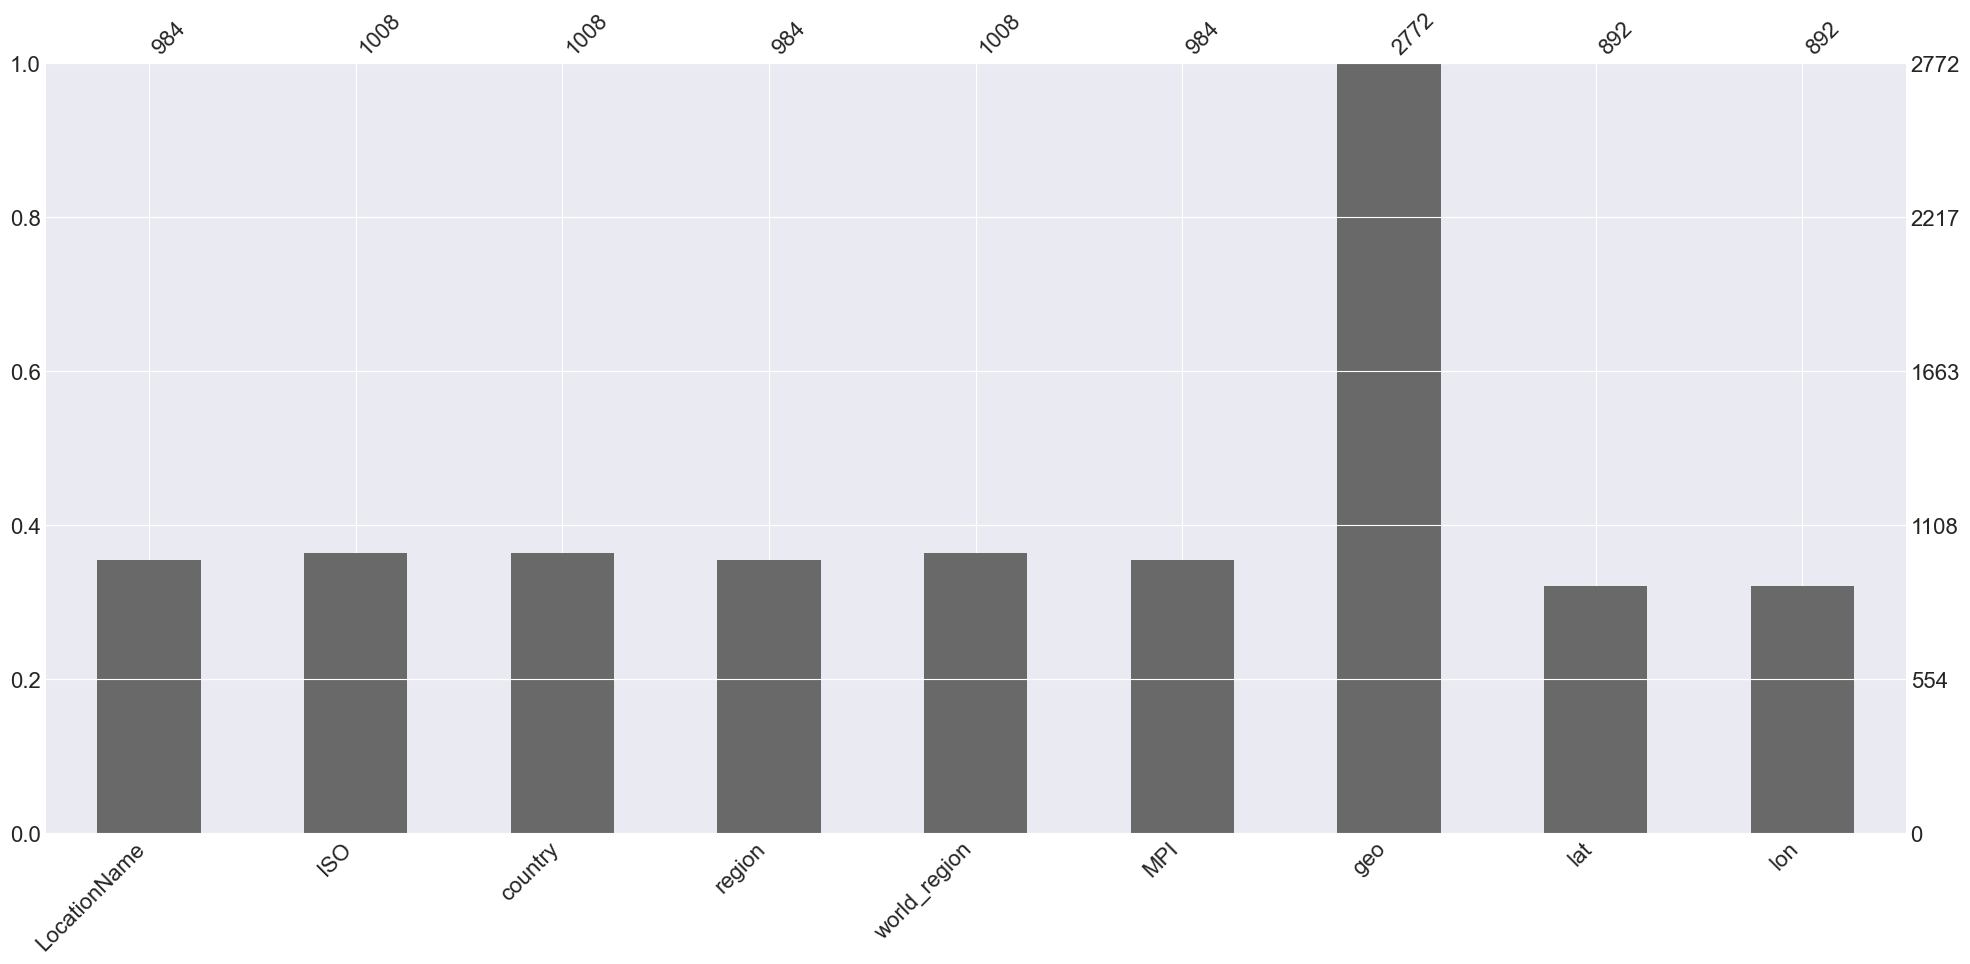

In [6]:
msno.bar(df_mpi)

In [7]:
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


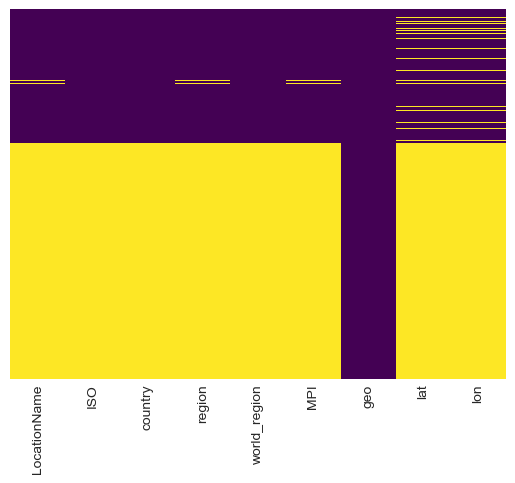

In [8]:
sns.heatmap(df_mpi.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

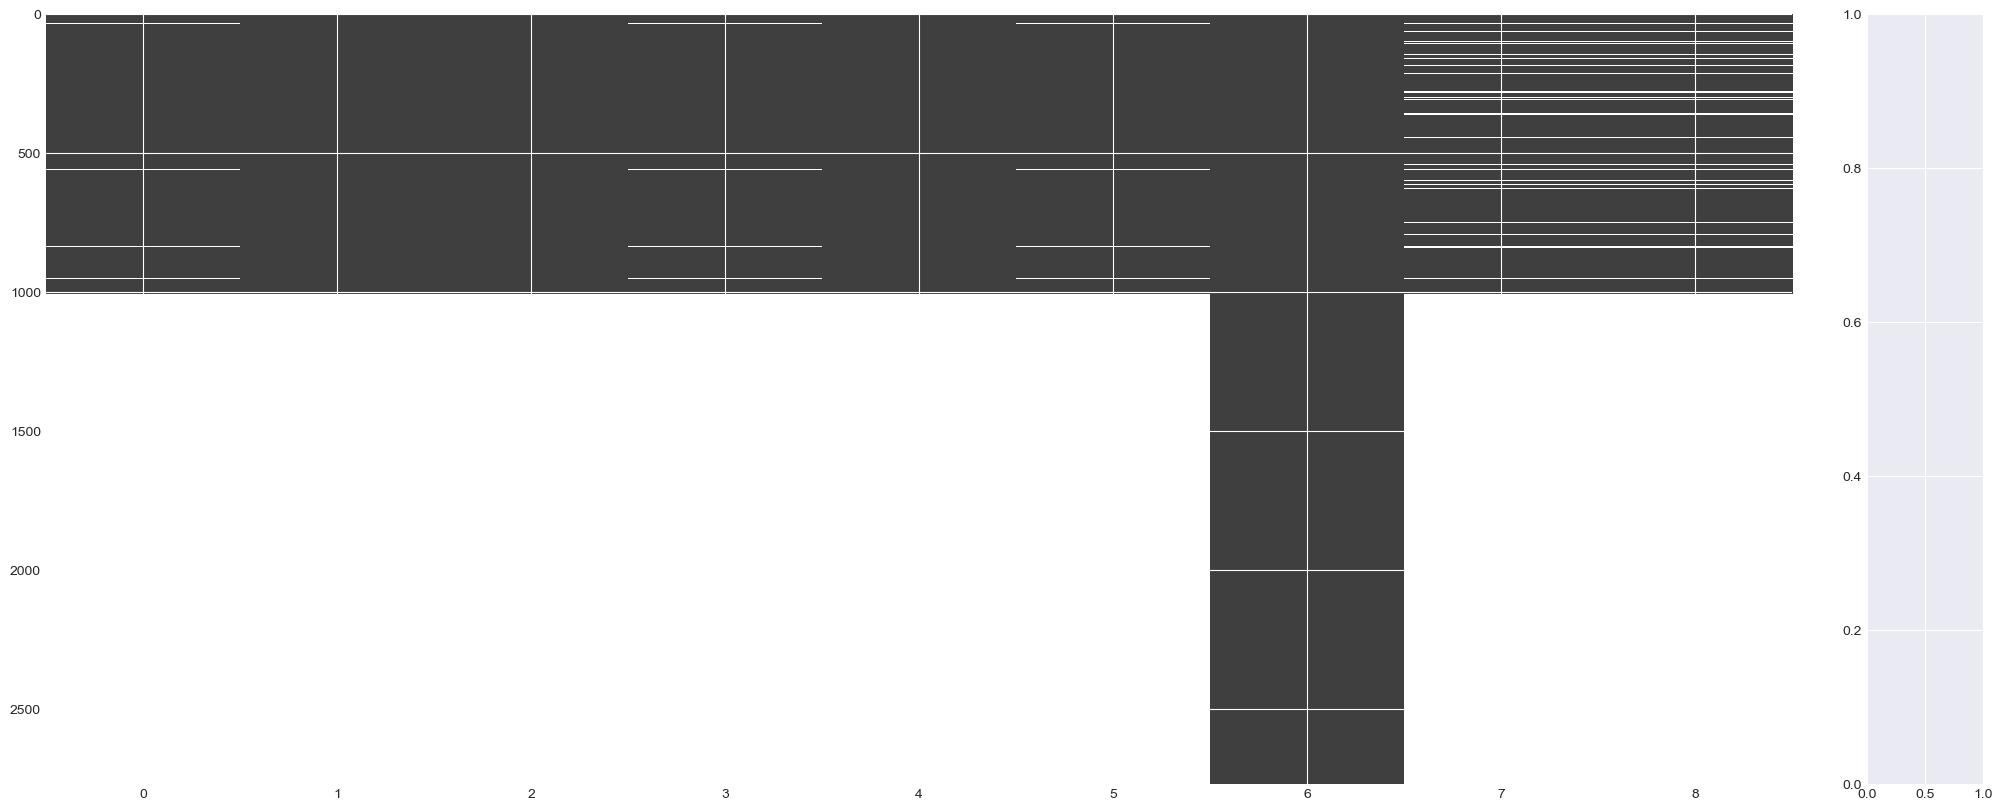

In [9]:
msno.matrix(df_mpi)

In [9]:
df_mpi.dtypes

LocationName     object
ISO              object
country          object
region           object
world_region     object
MPI             float64
geo              object
lat             float64
lon             float64
dtype: object

<Axes: >

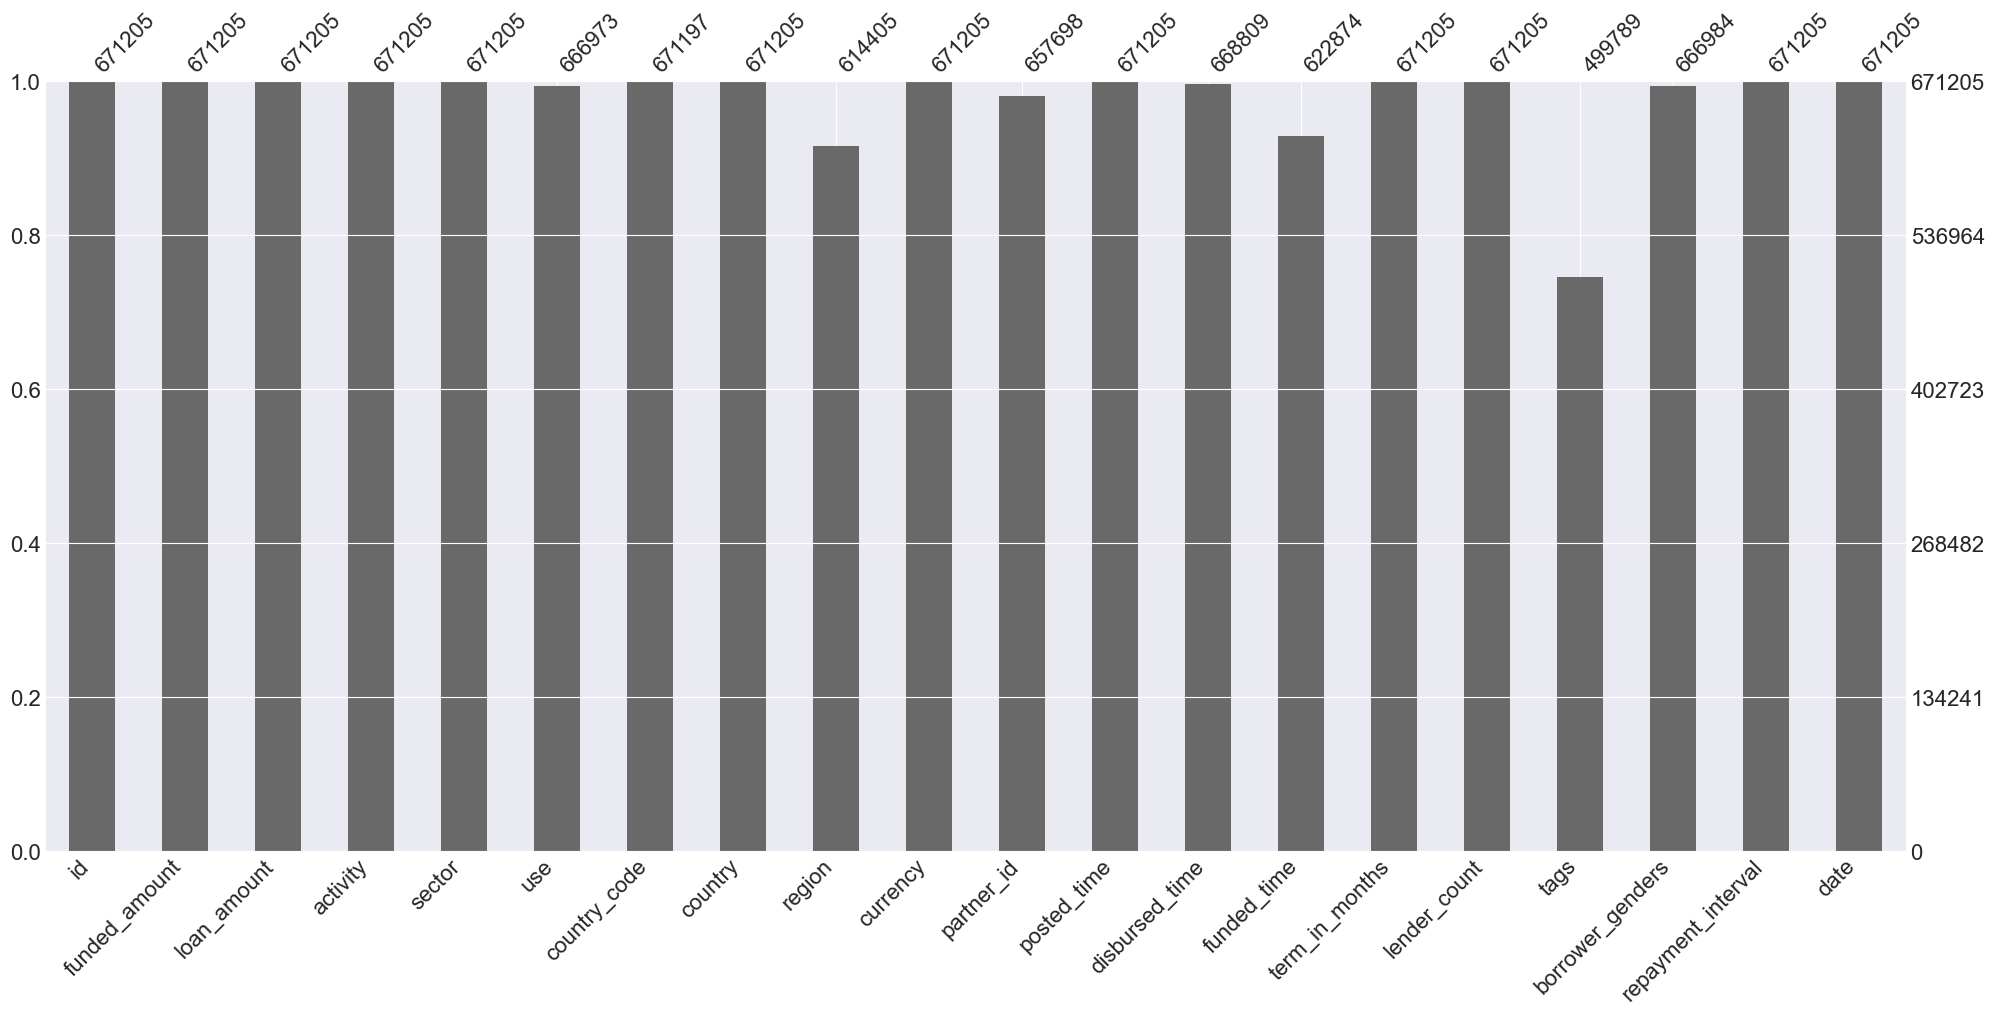

In [10]:
msno.bar(df_kiva_loans)

In [11]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

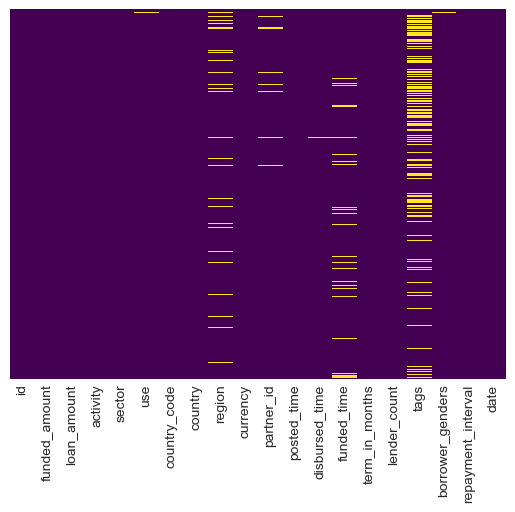

In [12]:
sns.heatmap(df_kiva_loans.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

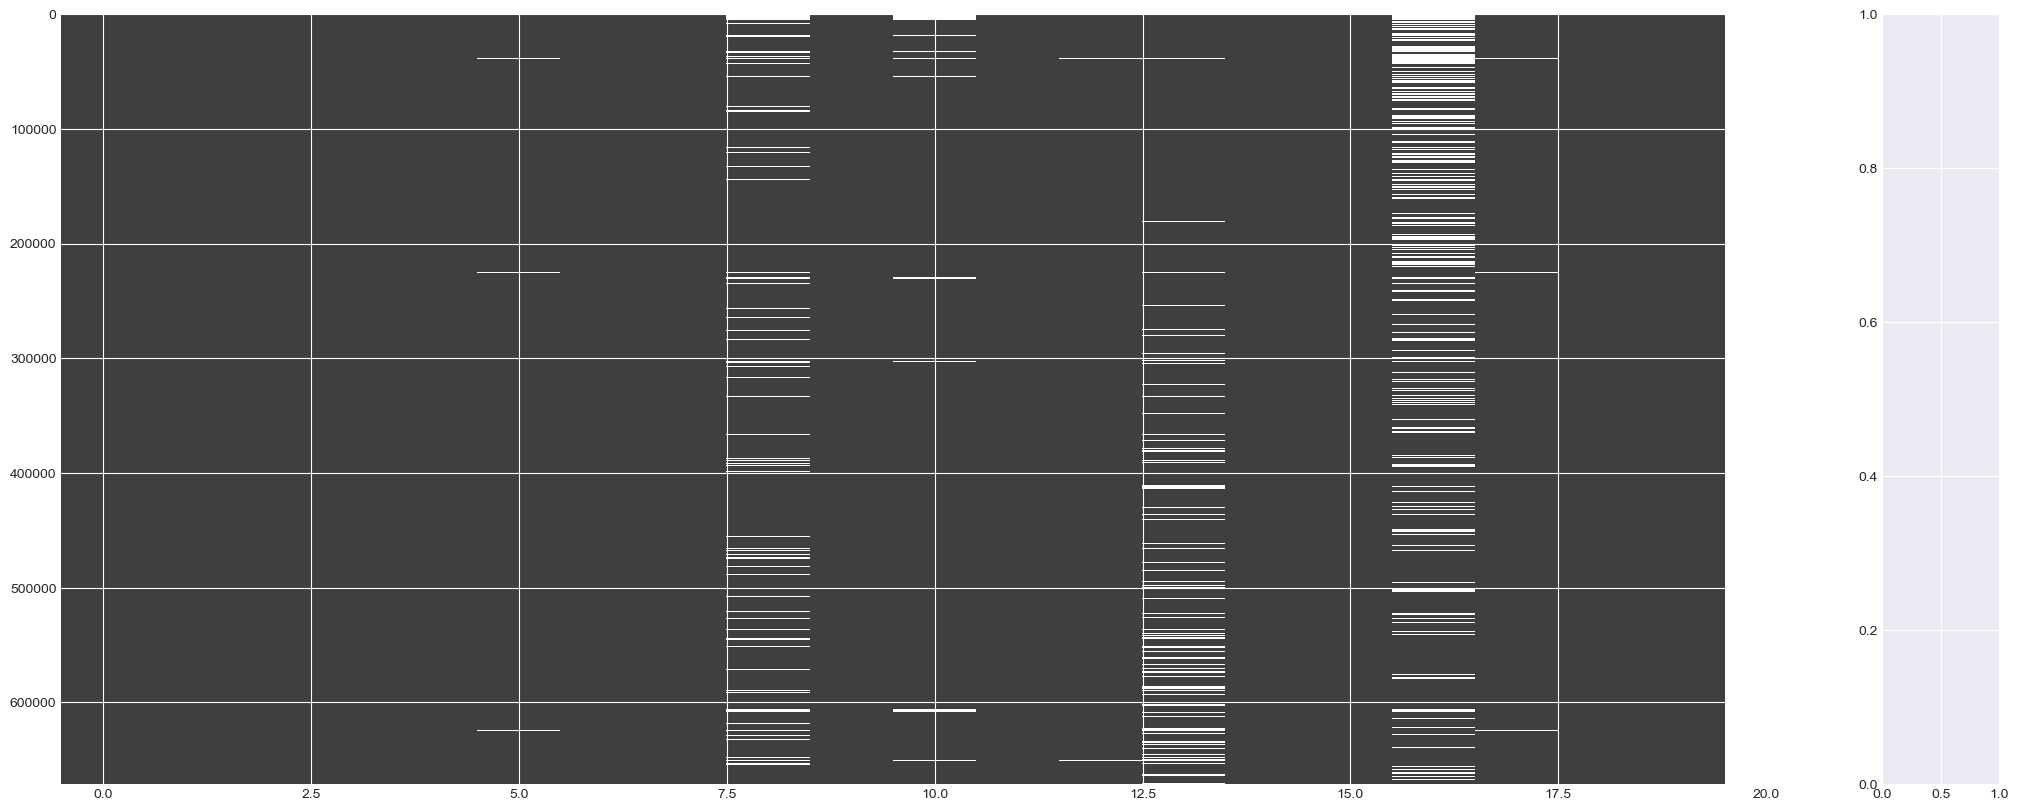

In [18]:
msno.matrix(df_kiva_loans)

In [14]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

**Что мы видим?**

В некоторых колонках присутствуют пропуски.

Помимо визуализаций, наличие пропусков можно отследить с помощью метода ```info()```.

### Задание 3. Попробуйте применить данный метод к нашим таблицам и сравните число ненулевых значений каждого признака с количеством строк датасетов



In [15]:
df_mpi.describe(include=[np.number])

,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


In [16]:
df_mpi.describe(include=[np.object])

C:\Users\Александр\AppData\Local\Temp\ipykernel_1112\3890635432.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_mpi.describe(include=[np.object])


,LocationName,ISO,country,region,world_region,geo
count,984,1008,1008,984,1008,2772
unique,984,102,102,928,6,881
top,"Badakhshan, Afghanistan",NGA,Nigeria,Central,Sub-Saharan Africa,"(1000.0, 1000.0)"
freq,1,37,37,8,432,1880


In [17]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [18]:
df_kiva_loans.describe(include=[np.object])

C:\Users\Александр\AppData\Local\Temp\ipykernel_1112\2838925238.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_kiva_loans.describe(include=[np.object])


,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


In [28]:
df_kiva_loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [19]:
df_mpi.isnull().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки.

Так как пропусков в данных немного, давайте выбросим строки, содержащие NaN.
### Задание 4. С помощью метода ```dropna``` удалите строки с пропусками из датасетов

*Подсказка: чтобы не перезаписывать данные ```(data=data.dropna())```, используйте параметр ```inplace = True```*.

In [20]:
df_kiva_loans.dropna(inplace = True)
df_kiva_loans.isnull().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
tags                  0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

Посчитайте количество записей в таблицах после удаления строк, содержащих NaN.

In [21]:
df_mpi.dropna(inplace = True)
df_mpi.isnull().sum()

LocationName    0
ISO             0
country         0
region          0
world_region    0
MPI             0
geo             0
lat             0
lon             0
dtype: int64

_____________

## Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, настало время перейти к постановке гипотез и их проверке.


### Задание 1. Используя таблицу ```df_kiva_loans```, попробуйте найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит, (**lender_count**) и суммой займа (**loan_amount**). Какие выводы можно сделать из этих данных?

**Для этого**:

1. Выделите три указанных столбца в отдельную таблицу `df_temp`.
2. Найдите корреляцию между признаками с помощью команды `df_temp.corr()`, сохраните полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируйте полученный результат, для наглядности задайте параметры `cmap='BrBG', annot=True`.




In [88]:
df_tem = df_kiva_loans[['term_in_months', 'lender_count', 'loan_amount']]\
    .groupby(['term_in_months', 'lender_count', 'loan_amount'])\
    .size()\
    .reset_index()\
    .fillna(0)

pos = len(df_tem.columns) - 1 
df_tem= df_tem.drop(columns=df_tem.columns[pos]) 
df_corr=df_tem.corr()

df_corr

,term_in_months,lender_count,loan_amount
term_in_months,1.000000,0.073282,-0.034768
lender_count,0.073282,1.000000,0.766008
loan_amount,-0.034768,0.766008,1.000000


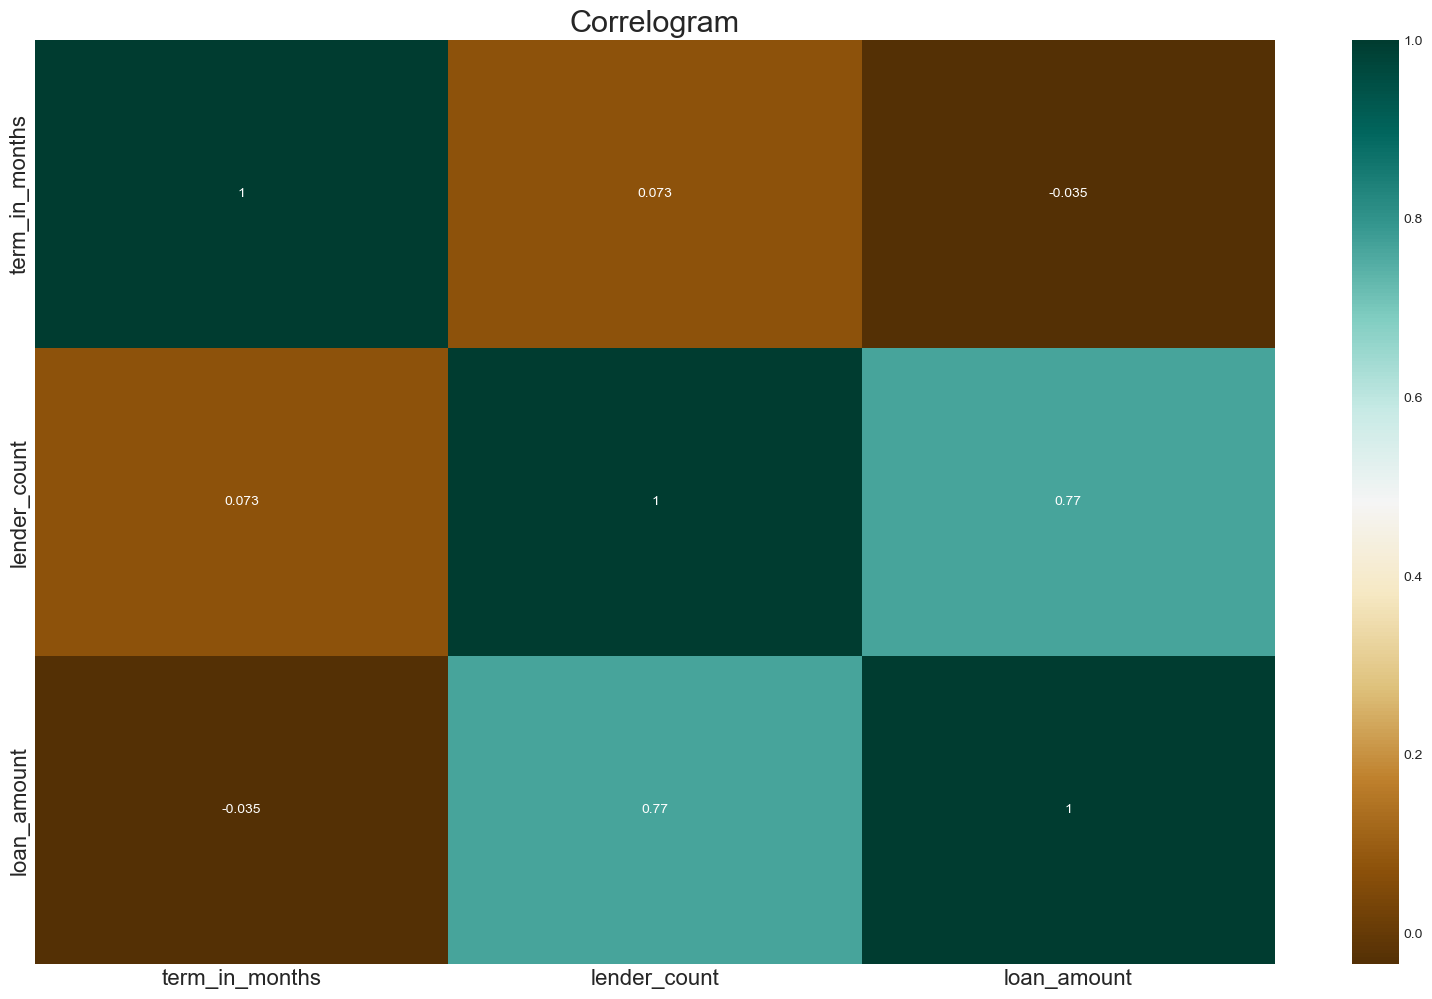

In [89]:
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(df_corr,cmap='BrBG',annot=True)
plt.title("Correlogram", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

**Вывод:**
    Влияние атрибута займа Количество кредиторов (lender_count) на суммы и сроки займов.

### Задание 2. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

In [90]:
def func(x): 
    if x <=0:
        return np.nan
    if 0 < x <= 3:
        return '(0, 3]'
    if 3 < x <= 7:
        return '(3, 7]'
    if 7 < x <= 12:
        return '(7, 12]'
    if 12 < x <= 23:
        return '(12, 23]'
    if 23 < x <= 100:
        return '(23, 100]'
    if x > 100:
        return '100 и более'

In [91]:
# сортируем по количеству кредиторов по возрастанию
lender_count = df_kiva_loans[['lender_count', 'loan_amount', 'term_in_months']].sort_values('lender_count')
# применяем первую функцию к столбцу lender_count и записываем в новый столбец lender_count_groups
lender_count['lender_count_groups'] = lender_count['lender_count'].apply(func)
# группируем по группам lender_count_groups и выводим медианные значения
lender_count_grouped = lender_count.groupby('lender_count_groups', sort=False).median()

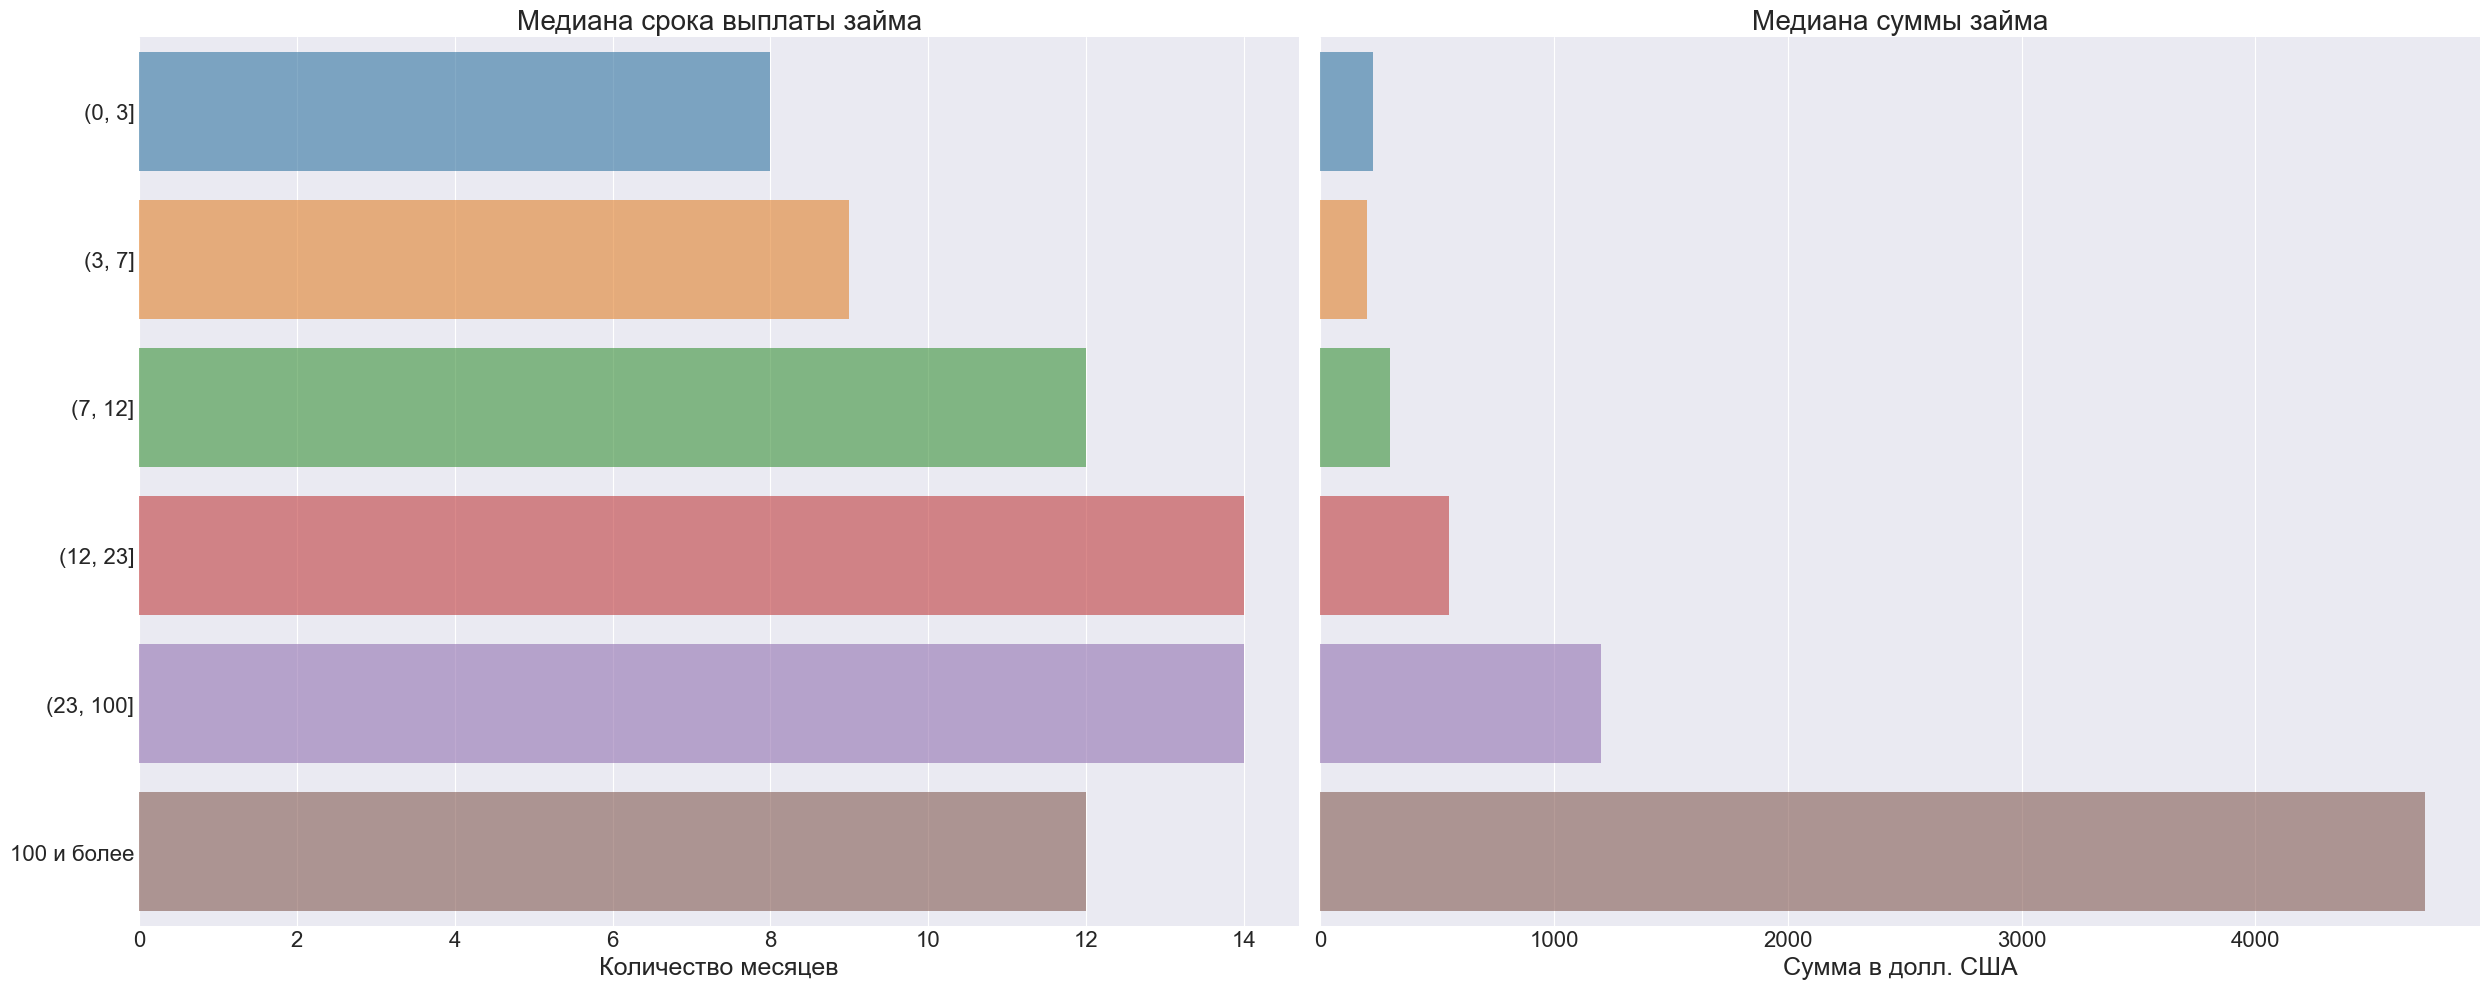

In [92]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y=lender_count_grouped.index, x='term_in_months', data=lender_count_grouped, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=lender_count_grouped.index, x='loan_amount', data=lender_count_grouped, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

**Вывод:**
Как мы видем, сумма займа увеличивается пропорционально количеству кредитов. Так же видно, что колличество кредитов не сильно зависит от сроков займов начиная с групп кредиторов от 10 и выше человек.

### Задание 3. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены?

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

In [3]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [4]:
df_kiva_loans_a = df_kiva_loans.sort_values('term_in_months')
df_kiva_loans_a['monthly_repayment'] = df_kiva_loans_a['loan_amount'] / df_kiva_loans_a['term_in_months']

In [5]:
df_kiva_loans_b=df_kiva_loans_a[df_kiva_loans_a['loan_amount']>=20000].sort_values('country',ascending=False)

In [6]:
df_kiva_loans_c = df_kiva_loans_b.merge(df_mpi_grouped, how='left', on='country')

In [7]:
df_kiva_loans_d=df_kiva_loans_c.groupby(['world_region', 'loan_amount','funded_time']).sum().reset_index()

C:\Users\Техподдержка Р\AppData\Local\Temp\ipykernel_19764\3288681104.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_kiva_loans_d=df_kiva_loans_c.groupby(['world_region', 'loan_amount','funded_time']).sum().reset_index()


C:\Users\Техподдержка Р\AppData\Local\Temp\ipykernel_19684\2253676141.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_kiva_loans_e= df_kiva_loans_d.groupby('world_region').median()


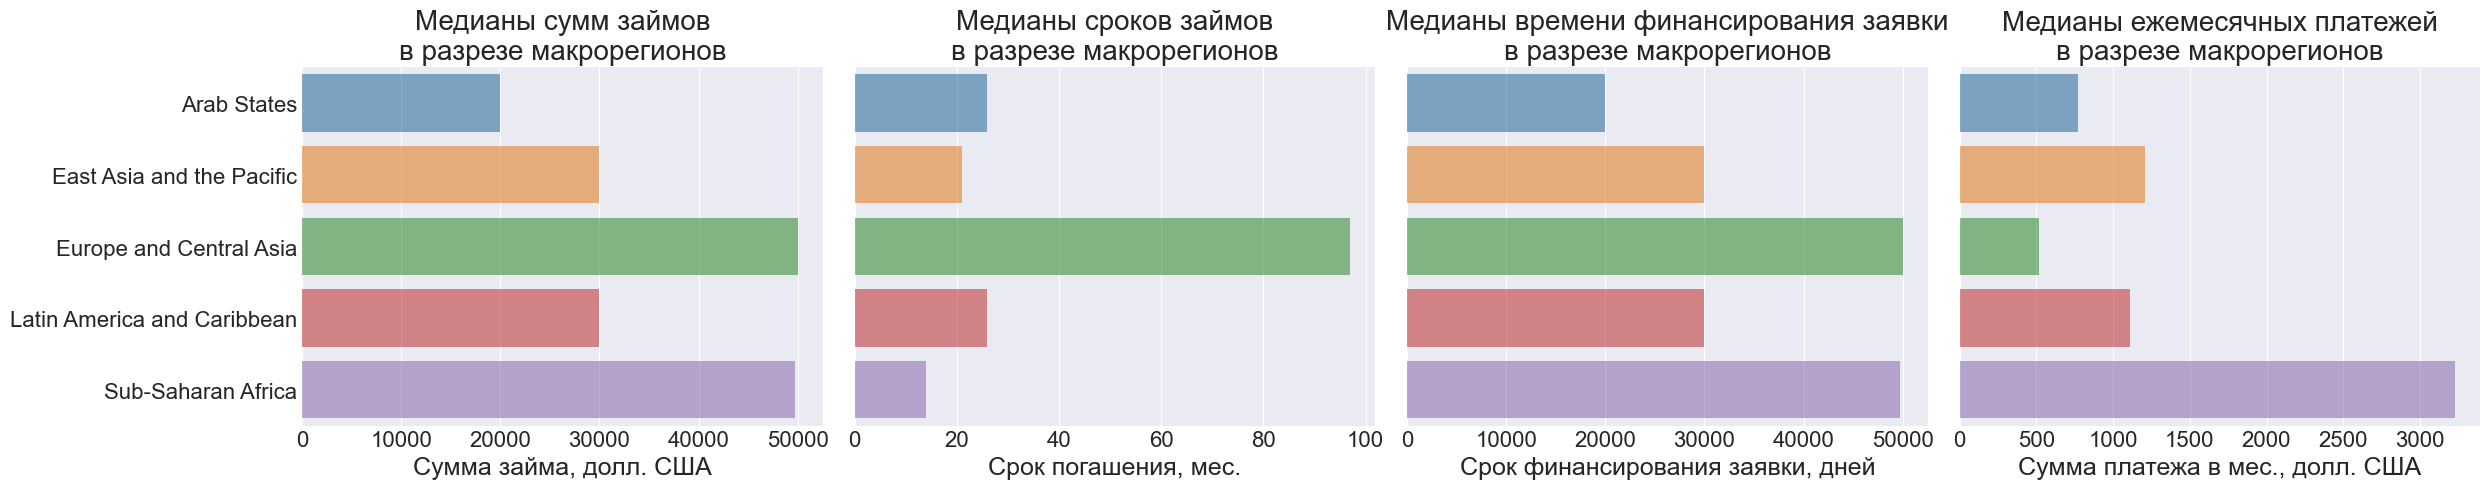

In [39]:
# Построим 4 графика в разрезе макрорегионов: 
# медианы сумм займов, сроков займов, времени финансирования заявки, а также ежемесячного платежа

df_kiva_loans_e= df_kiva_loans_d.groupby('world_region').median()
f,ax=plt.subplots(1, 4, sharey=True, figsize=(25,5))

sns.barplot(y=df_kiva_loans_e.index, x='loan_amount', data=df_kiva_loans_e, alpha=0.6, ax=ax[0])
ax[0].set_title("Медианы сумм займов\nв разрезе макрорегионов", fontsize=20)
ax[0].set_xlabel('Сумма займа, долл. США', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=df_kiva_loans_e.index, x='term_in_months', data=df_kiva_loans_e, alpha=0.6, ax=ax[1])
ax[1].set_title("Медианы сроков займов\nв разрезе макрорегионов", fontsize=20)
ax[1].set_xlabel('Срок погашения, мес.', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=df_kiva_loans_e.index, x='funded_amount', data=df_kiva_loans_e, alpha=0.6, ax=ax[2])
ax[2].set_title("Медианы времени финансирования заявки\nв разрезе макрорегионов", fontsize=20)
ax[2].set_xlabel('Срок финансирования заявки, дней', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

sns.barplot(y=df_kiva_loans_e.index, x='monthly_repayment', data=df_kiva_loans_e, alpha=0.6, ax=ax[3])
ax[3].set_title("Медианы ежемесячных платежей\nв разрезе макрорегионов", fontsize=20)
ax[3].set_xlabel('Сумма платежа в мес., долл. США', fontsize=18)
ax[3].set_ylabel(None)
ax[3].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

**Вывод:**
Наибольшие суммы займов в Арабских странах, соответственно и суммы платежа в месяц, тоже самые высокие. При это сроки погашения около 15 - 20 месяцев, а финансируются заявки за 10-15 дней всего. Это может говорить о высоком уровне доверия кредиторов к странам данного региона. В Европейских же странах, хотя суммы займов тоже высокие, но несколько ниже чем в странах Арабского региона, но сроки погашения гораздо выше (превышают 25 месяцев по медианному значению), при этом ежемесячные платежи, совершаемые в этих странах почти в 2 раза меньше, чем в страха Арабского региона. Самыми же малыми займами пользуются страны Африки и Юго-Восточной Азии.

____________

## Многомерный уровень бедности

### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [16]:
df_mpi_group = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .median()\
    .fillna(0)\
    .reset_index()

In [17]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_group, how='left', on='country')

In [18]:
regions = df_kiva_loans['world_region'].value_counts()

In [19]:
regions_list = regions.index.to_list()

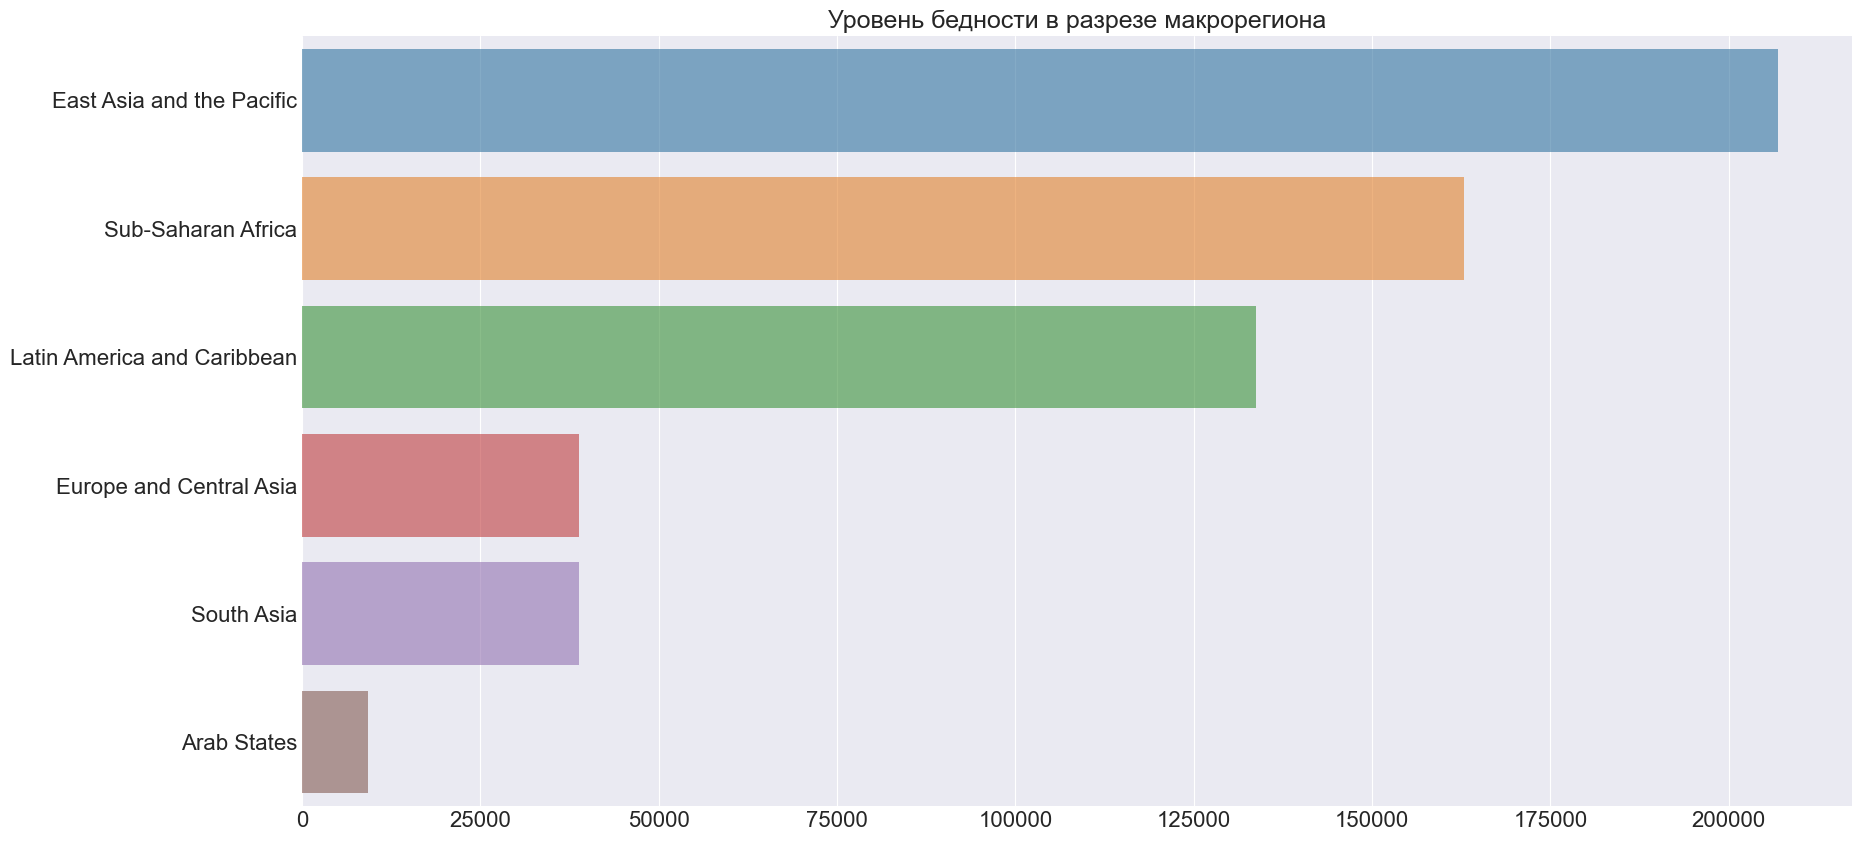

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title("Уровень бедности в разрезе макрорегиона", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

 **Вывод:**
Наибольший уровень бедности по показателю MPI так-же доминирует в  Арабских странах, в связис этим и наглядно видно увеличеие количества займов

### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

In [10]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [11]:
df_kiva_loans_mpi = df_kiva_loans_a.merge(df_mpi_grouped, how='left', on='country')

In [12]:
# выбираем нужные столбцы в датафрейме и удаляем страны, составляющие менее 0,5% сообщества Kiva
mpi_loans_terms = df_kiva_loans_mpi[['country', 'MPI', 'loan_amount', 'term_in_months']][df_kiva_loans_mpi['country']\
    .isin(list_countries)]

In [13]:
# убираем те строки, где MPI имеет значение 0 и пропущенные значения
mpi_loans_terms = mpi_loans_terms[mpi_loans_terms['MPI'].astype(bool)]\
    .dropna() 

In [14]:
# группируем по MPI и приводим медианные значения для каждой группы
mpi_loans_terms = mpi_loans_terms.groupby('MPI').median()
# приводим к целочисленным значениям
mpi_loans_terms = mpi_loans_terms.applymap(int) 

C:\Users\Техподдержка Р\AppData\Local\Temp\ipykernel_19764\2101826322.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpi_loans_terms = mpi_loans_terms.groupby('MPI').median()


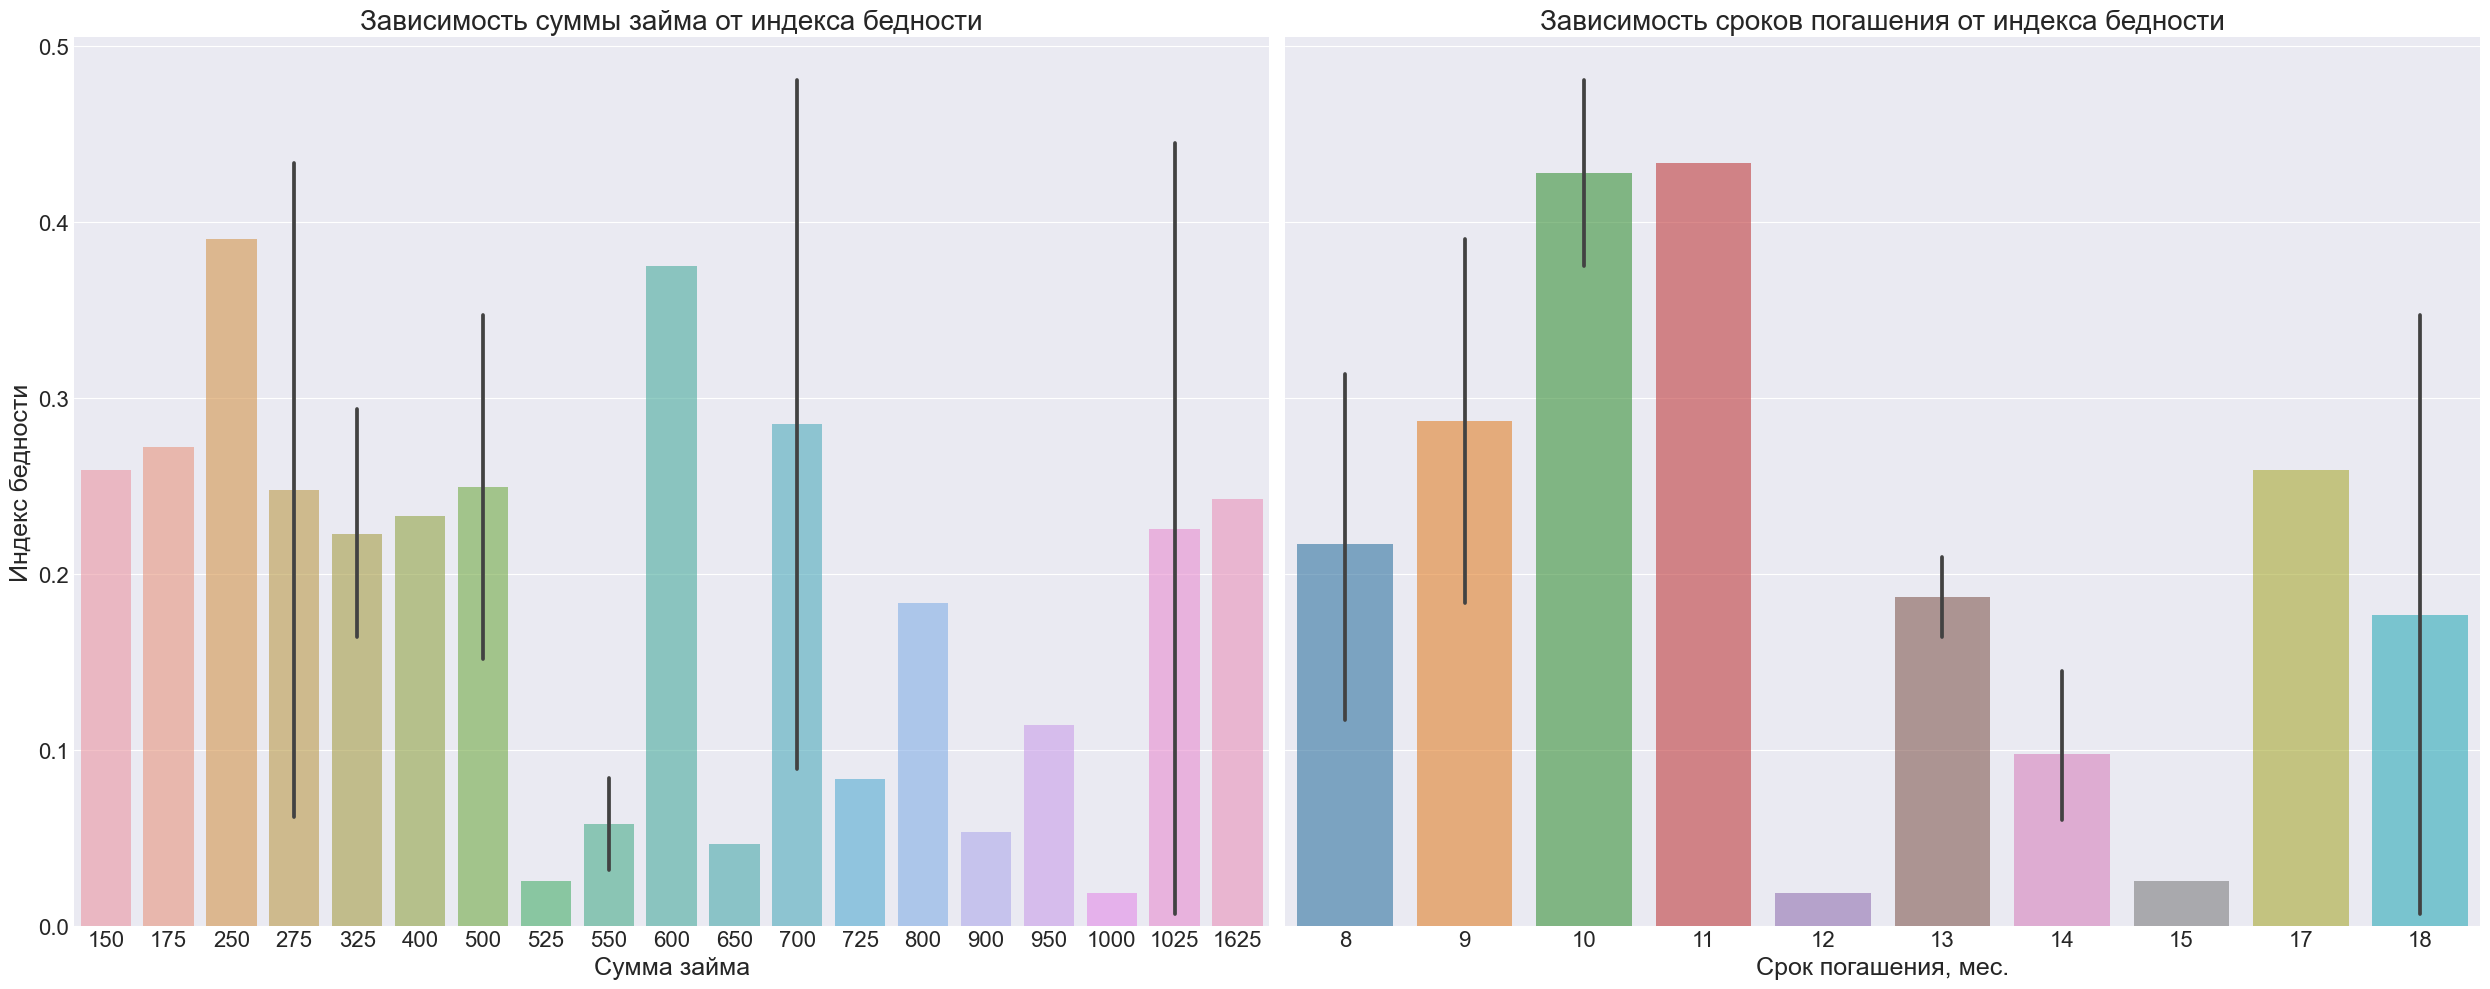

In [15]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y=mpi_loans_terms.index, x='loan_amount', data=mpi_loans_terms, alpha=0.6, ax=ax[0])
ax[0].set_title("Зависимость суммы займа от индекса бедности", fontsize=20)
ax[0].set_xlabel('Сумма займа', fontsize=18)
ax[0].set_ylabel('Индекс бедности', fontsize=18)
ax[0].tick_params(labelsize=16)

sns.barplot(y=mpi_loans_terms.index, x='term_in_months', data=mpi_loans_terms, alpha=0.6, ax=ax[1])
ax[1].set_title("Зависимость сроков погашения от индекса бедности", fontsize=20)
ax[1].set_xlabel('Срок погашения, мес.', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

**Вывод:**
Здесь мы видим, что в странах с высоким уровнем бедности популярны займы на суммы 250 и 600 долларов, с странах со средним уровнем бедности популярны займы до 500, а также на 700, 1000 и 1075 долларов. А в странах с низким уровнем бедности популярны займы на суммы 525, 550, 650, 725, 875 и 1025 долларов. В то время как в странах с высоким уровнем бедности больше всего займов берут на срок в 10-11 месяцев, а в странах с низким уровнем бедности чаще всего берут займы на год или год и 3 месяца.